In [1]:
import pandas as pd
import numpy as np
import os, time, stat, io, glob, pickle, subprocess
from scipy.stats import gamma, norm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib as mpl

from covid_data_helper import *
from coronita_chart_helper import *
from coronita_web_helper import *
from coronita_bokeh_helper import *

### Settings and Functions for Personal Website ###
# plt.style.use('file://Users/mdonnelly/repos/coronita/personal_covidoutlook.mplstyle')
plt.style.use('ggplot')

def footnote_str_maker():
    footnote_str = 'www.COVIDoutlook.info | twtr: @COVIDoutlook\nChart created on {}'.format(
        pd.Timestamp.today().strftime("%d %b, %Y at %I:%M %p"))
    return footnote_str


def add_plotly_footnote(fig):
    fig.update_layout(
                  annotations=[
                      dict(x = 0, y = 0,
                           xref='paper', yref='paper', font_size=12, showarrow=False,
                           xanchor='left', yanchor='top', xshift=0, yshift=0,
                            text='<a href="http://{0}">{0}</a> | twtr: <a href="https://twitter.com/COVIDoutlook">@COVIDoutlook</a>'.format(
                           'www.COVIDoutlook.info')
                          ),
                      dict(x = 0, y = -0.05,
                           xref='paper', yref='paper', font_size=10, showarrow=False,
                           xanchor='left', yanchor='top', xshift=0, yshift=0,
                           text='Chart created on {}'.format(pd.Timestamp.today().strftime("%d %b %Y"))
                          )
                  ]
                 )
    fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/donnellymjd/COVIDoutlook/master/assets/img/logo-whiteonblack.png", #"https://raw.githubusercontent.com/cldougl/plot_images/add_r_img/vox.png",
        xref="paper", yref="paper",
        x=0, y=0,
        sizex=0.15, sizey=0.15,
        xanchor="left", yanchor="bottom",
        layer='above'
    )
)
    return fig

In [2]:
list_of_files = glob.glob('./output/allstate_model_dicts_*.pkl') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)
with open(latest_file, 'rb') as handle:
    allstate_model_dicts = pickle.load(handle)

./output/allstate_model_dicts_20210124.pkl


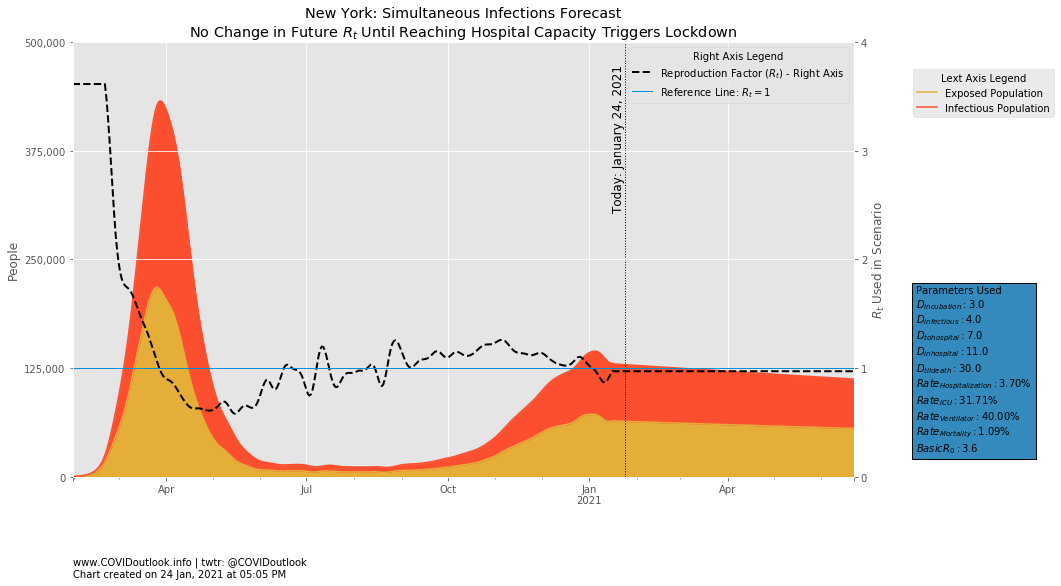

In [8]:
model_dict = allstate_model_dicts['NY']
model_dict['footnote_str'] = footnote_str_maker()
ax = ch_exposed_infectious(model_dict)
plt.savefig('NY_ch_exposed_infectious_20200124.pdf', bbox_inches='tight')
